In [57]:
# Prob 1Load Libraries
import pandas as pd
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.conversion import localconverter
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
# Activate pandas-to-R conversion
pandas2ri.activate() 

In [ ]:
# 1A Import and view Data

# Load the airquality dataset from R
r_data = r('datasets::airquality')

# Convert to pandas DataFrame
with localconverter(pandas2ri.converter):
    airquality_df = pandas2ri.rpy2py(r_data)

# Display the DataFrame
print(airquality_df)
print(airquality_df.describe()) 

wind = airquality_df['Wind']

# Count NA values
na_count = wind.isna().sum().sum()

# Count infinite values
inf_count = np.isinf(wind).sum().sum()
print(f"NA count: {na_count}, 'Infinity count': {inf_count}")

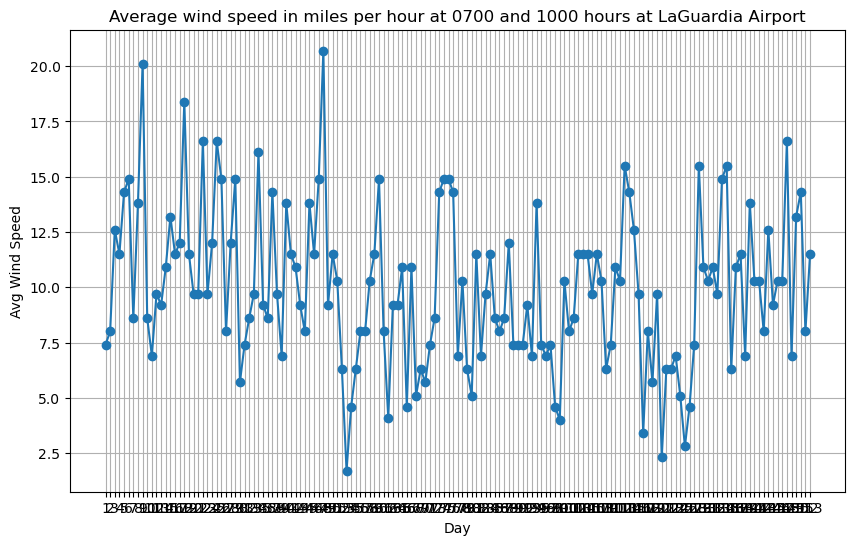

<Figure size 1000x600 with 0 Axes>

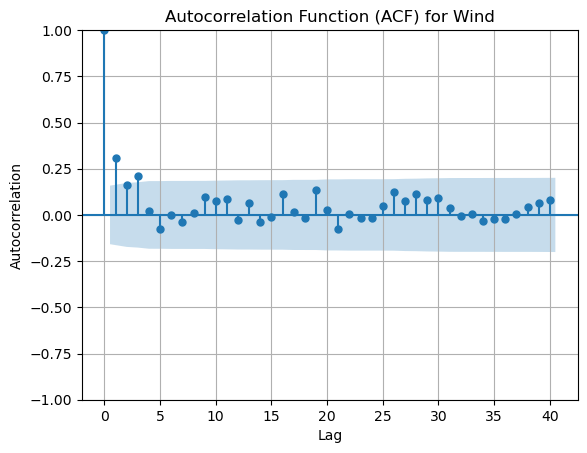

                            AutoReg Model Results                             
Dep. Variable:                   Wind   No. Observations:                  153
Model:                     AutoReg(1)   Log Likelihood                -399.095
Method:               Conditional MLE   S.D. of innovations              3.342
Date:                Wed, 27 Nov 2024   AIC                            804.190
Time:                        10:18:22   BIC                            813.262
Sample:                             1   HQIC                           807.875
                                  153                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8837      0.813      8.472      0.000       5.291       8.476
Wind.L1        0.3107      0.077      4.035      0.000       0.160       0.462
                                    Roots           

/Users/diegosinay/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/diegosinay/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1000x600 with 0 Axes>

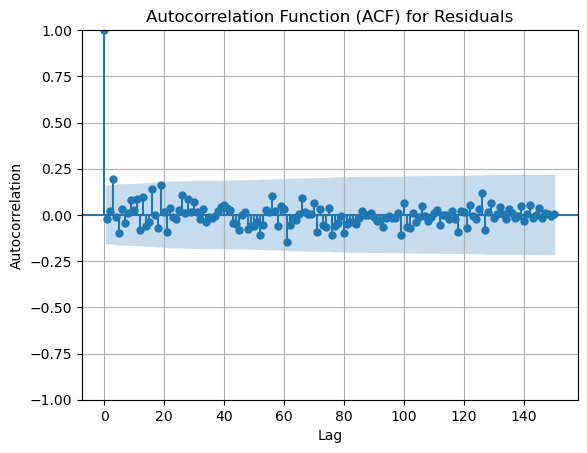

In [48]:
# Prob 1A
# Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
plt.figure(figsize=(10, 6))
plt.plot(wind, marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Avg Wind Speed')
plt.title('Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport')
plt.grid(True)
plt.show()
# The most prevailing characterisitic seams to be either a autocorrelation

# Create the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(wind, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Wind')
plt.grid(True)
plt.show()
# It appears that the most prevealing characteristic of the time serries is that is is mean reverting

auto_reg_model = AutoReg(wind, lags=1).fit()
print(auto_reg_model.summary())

# Produce the ACF plot of the residuals
residuals = auto_reg_model.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals')
plt.grid(True)
plt.show()

In [58]:
# 1B Import and view Data

# Load the airquality dataset from R
r_data = r('datasets::austres')

# Display the DataFrame
print(r_data)

# Create a pandas DataFrame 
index = np.arange(len(r_data))
australian_res_df = pd.DataFrame({
    't': index,
    'Australian Residents': r_data
})
australian_res_df.set_index('t', inplace=True)
print(australian_res_df.describe())

# Count NA values
na_count = australian_res_df.isna().sum().sum()

# Count infinite values
inf_count = np.isinf(australian_res_df).sum().sum()
print(f"NA count: {na_count}, 'Infinity count': {inf_count}")


[13067.3 13130.5 13198.4 13254.2 13303.7 13353.9 13409.3 13459.2 13504.5
 13552.6 13614.3 13669.5 13722.6 13772.1 13832.  13862.6 13893.  13926.8
 13968.9 14004.7 14033.1 14066.  14110.1 14155.6 14192.2 14231.7 14281.5
 14330.3 14359.3 14396.6 14430.8 14478.4 14515.7 14554.9 14602.5 14646.4
 14695.4 14746.6 14807.4 14874.4 14923.3 14988.7 15054.1 15121.7 15184.2
 15239.3 15288.9 15346.2 15393.5 15439.  15483.5 15531.5 15579.4 15628.5
 15677.3 15736.7 15788.3 15839.7 15900.6 15961.5 16018.3 16076.9 16139.
 16203.  16263.3 16327.9 16398.9 16478.3 16538.2 16621.6 16697.  16777.2
 16833.1 16891.6 16956.8 17026.3 17085.4 17106.9 17169.4 17239.4 17292.
 17354.2 17414.2 17447.3 17482.6 17526.  17568.7 17627.1 17661.5]
       Australian Residents
count             89.000000
mean           15273.449438
std             1356.812524
min            13067.300000
25%            14110.100000
50%            15184.200000
75%            16398.900000
max            17661.500000
NA count: 0, 'Infinity coun

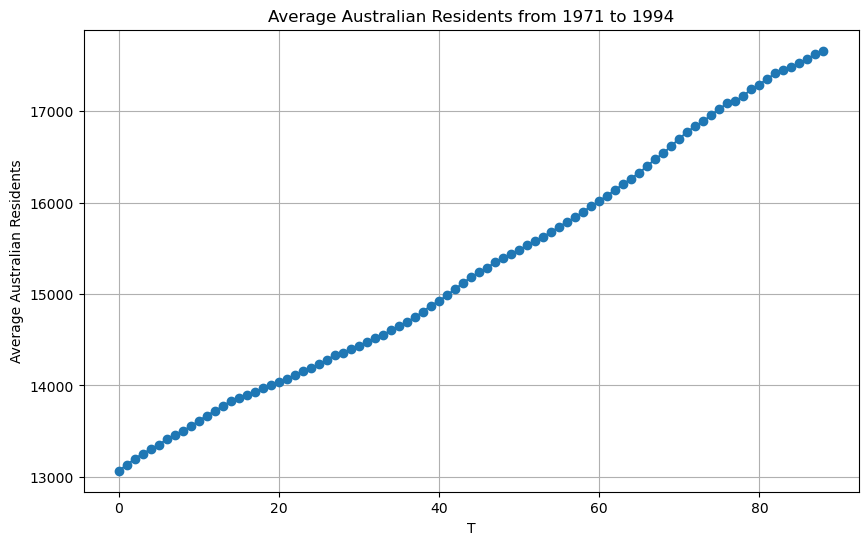

<Figure size 1000x600 with 0 Axes>

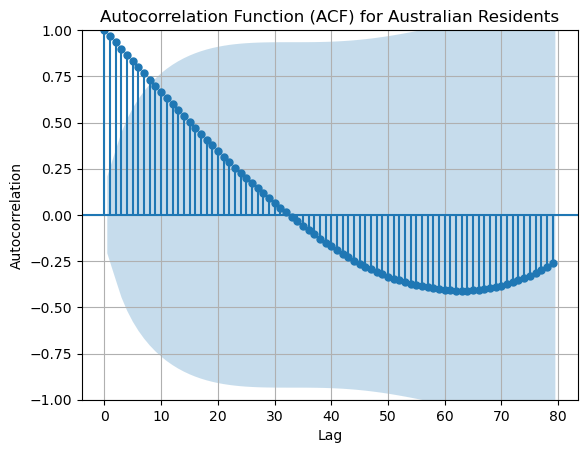

                             AutoReg Model Results                              
Dep. Variable:     Australian Residents   No. Observations:                   89
Model:                       AutoReg(1)   Log Likelihood                -344.377
Method:                 Conditional MLE   S.D. of innovations             12.115
Date:                  Wed, 27 Nov 2024   AIC                            694.755
Time:                          10:32:06   BIC                            702.187
Sample:                               1   HQIC                           697.749
                                     89                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      11.6519     14.834      0.786      0.432     -17.422      40.725
Australian Residents.L1     1.0027      0.001   1034.479      0.000       1.

<Figure size 1000x600 with 0 Axes>

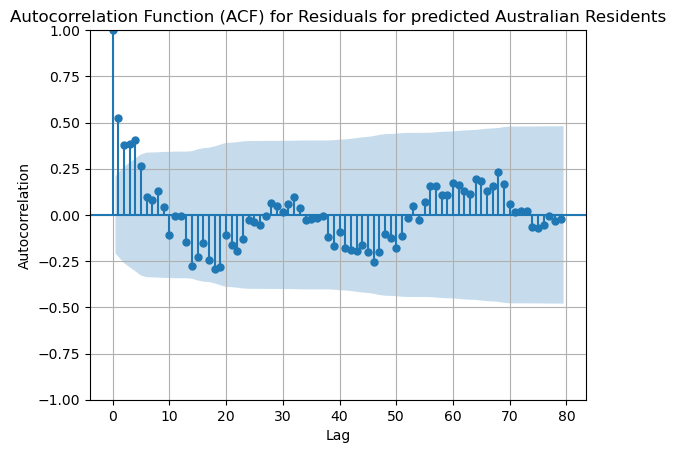

In [59]:
# Prob 1B
# Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
plt.figure(figsize=(10, 6))
plt.plot(australian_res_df['Australian Residents'], marker='o', linestyle='-')
plt.xlabel('T')
plt.ylabel('Average Australian Residents')
plt.title('Average Australian Residents from 1971 to 1994')
plt.grid(True)
plt.show()
# The most prevailing characterisitic seams to a strong trend (with some autocorrelation)

# Create the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(australian_res_df['Australian Residents'], lags=79)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Australian Residents')
plt.grid(True)
plt.show()
# The autocorrelation plot shows a slow decay in the autocorrelation, indicating that the data could be a random walk

auto_reg_model_australian_res = AutoReg(australian_res_df['Australian Residents'], lags=1).fit()
print(auto_reg_model_australian_res.summary())

# Produce the ACF plot of the residuals
residuals_australian_res = auto_reg_model_australian_res.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals_australian_res, lags=79)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals for predicted Australian Residents')
plt.grid(True)
# There seems to be a sesonality dependence still on the residuals of the model



                             OLS Regression Results                             
Dep. Variable:     Australian Residents   R-squared:                       0.995
Model:                              OLS   Adj. R-squared:                  0.995
Method:                   Least Squares   F-statistic:                 1.508e+04
Date:                  Wed, 27 Nov 2024   Prob (F-statistic):           1.74e-83
Time:                          10:43:47   Log-Likelihood:                -416.00
No. Observations:                    72   AIC:                             836.0
Df Residuals:                        70   BIC:                             840.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.279e+04     25.384

<Figure size 1000x600 with 0 Axes>

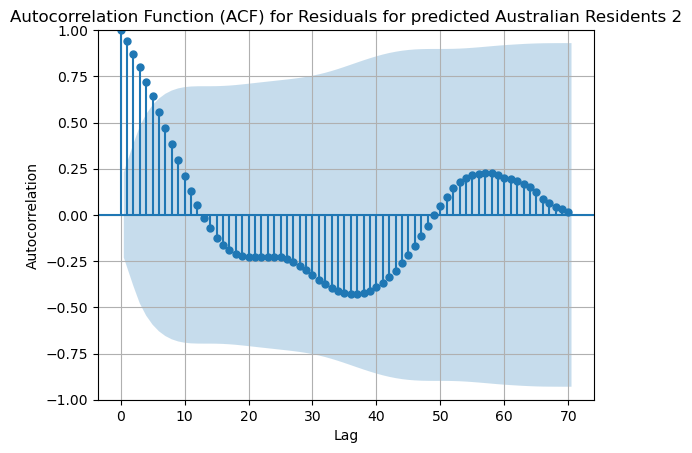

In [ ]:
# 1B another way with noise
# Add lagged values as a new column
australian_res_df['Lagged'] = australian_res_df['Australian Residents'].shift(1)

# Drop the first row with NaN value due to lagging
australian_res_df.dropna(inplace=True)

# Define the predictors (including the lagged values and the 't' variable)
X = australian_res_df[['Lagged']]
X['t'] = australian_res_df.index
X = sm.add_constant(X)  # Add a constant term for the intercept

# Define the response variable
y = australian_res_df['Australian Residents']

# Fit the OLS regression model
auto_reg_model_australian_res2 = sm.OLS(y, X).fit()

# Print the summary of the model
print(auto_reg_model_australian_res2.summary())

# Produce the ACF plot of the residuals
residuals_australian_res2 = auto_reg_model_australian_res2.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals_australian_res2, lags=70)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals for predicted Australian Residents 2')
plt.grid(True)